<a href="https://colab.research.google.com/github/Bandiesabme/opre_SRTF/blob/main/SRTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
#@title SRTF
%%writefile SRTF.cpp
#include <iostream>
#include <vector>
#include <climits>

#include <fstream>
using namespace std;


struct Process {
    int pid; // Process ID
    int arrival_time; // Arrival time
    int burst_time; // Burst time
};

void exportToCSV(vector<Process>& processes, vector<int>& waiting_time, vector<int>& turnaround_time) {
    std::ofstream file("output.csv");
    file << "Process ID,Arrival Time,Burst Time,Waiting Time,Turnaround Time\n";
    for (int i = 0; i < processes.size(); i++) {
        file << processes[i].pid << ","
             << processes[i].arrival_time << ","
             << processes[i].burst_time << ","
             << waiting_time[i] << ","
             << turnaround_time[i] << "\n";
    }
    file.close();
    cout << "Output saved to output.csv!" << endl;
}

void findWaitingTime(vector<Process>& processes, vector<int>& waiting_time) {
    int n = processes.size();
    vector<int> remaining_time(n);
    for (int i = 0; i < n; i++) {
        remaining_time[i] = processes[i].burst_time;
    }

    int complete = 0, actualTime = 0, min_time = INT_MAX;
    int shortest = 0;
    bool found = false;

    while (complete != n) {
        for (int i = 0; i < n; i++) {
            if (processes[i].arrival_time <= actualTime && remaining_time[i] < min_time && remaining_time[i] > 0) {
                min_time = remaining_time[i];
                shortest = i;
                found = true;
            }
        }

        if (!found) {
            actualTime++;

        }
        else{

          remaining_time[shortest]--;
          min_time = remaining_time[shortest];
          if (min_time == 0) {
            min_time = INT_MAX;
          }

          if (remaining_time[shortest] == 0) {
              complete++;
              found = false;
              int finish_time = actualTime + 1;
              waiting_time[shortest] = finish_time - processes[shortest].burst_time - processes[shortest].arrival_time;

              if (waiting_time[shortest] < 0) {
                 waiting_time[shortest] = 0;
              }
            }
           actualTime++;
         }

    }
}

void findTurnAroundTime(vector<Process>& processes, vector<int>& waiting_time, vector<int>& turnaround_time) {
    int n = processes.size();
    for (int i = 0; i < n; i++) {
        turnaround_time[i] = processes[i].burst_time + waiting_time[i];
    }
}

void findAvgTime(vector<Process>& processes) {
    int n = processes.size();
    vector<int> waiting_time(n), turnaround_time(n);

    findWaitingTime(processes, waiting_time);
    findTurnAroundTime(processes, waiting_time, turnaround_time);

    cout << "Processes  Arrival Time  Burst Time  Waiting Time  Turnaround Time\n";

    int total_waiting_time = 0, total_turnaround_time = 0;
    for (int i = 0; i < n; i++) {
        total_waiting_time += waiting_time[i];
        total_turnaround_time += turnaround_time[i];
        cout << "    " << processes[i].pid << "\t\t" << processes[i].arrival_time
             << "\t    " << processes[i].burst_time << "\t      " << waiting_time[i]
             << "\t\t  " << turnaround_time[i] << endl;
    }

    cout << "\nAverage Waiting Time: " << (float)total_waiting_time / n << endl;
    cout << "Average Turnaround Time: " << (float)total_turnaround_time / n << endl;
    exportToCSV(processes,waiting_time,turnaround_time);
}





int main(){
  vector<Process> processes = {
    {1, 0, 3},
    {2, 1, 5},
    {3, 2, 1},
    {4, 3, 2},
    {5, 4, 6},
    {6, 5, 4},
    {7, 6, 7},
    {8, 7, 8},
    {9, 8, 3},
    {10, 9, 5},
    {11, 10, 4},
    {12, 11, 6}
};

    findAvgTime(processes);
    return 0;
}





Overwriting SRTF.cpp


In [81]:
#@title SRTF run
%%script bash
g++ SRTF.cpp -o SRTF
./SRTF





Processes  Arrival Time  Burst Time  Waiting Time  Turnaround Time
    1		0	    3	      0		  3
    2		1	    5	      16		  21
    3		2	    1	      1		  2
    4		3	    2	      1		  3
    5		4	    6	      23		  29
    6		5	    4	      1		  5
    7		6	    7	      33		  40
    8		7	    8	      39		  47
    9		8	    3	      2		  5
    10		9	    5	      13		  18
    11		10	    4	      3		  7
    12		11	    6	      22		  28

Average Waiting Time: 12.8333
Average Turnaround Time: 17.3333
Output saved to output.csv!


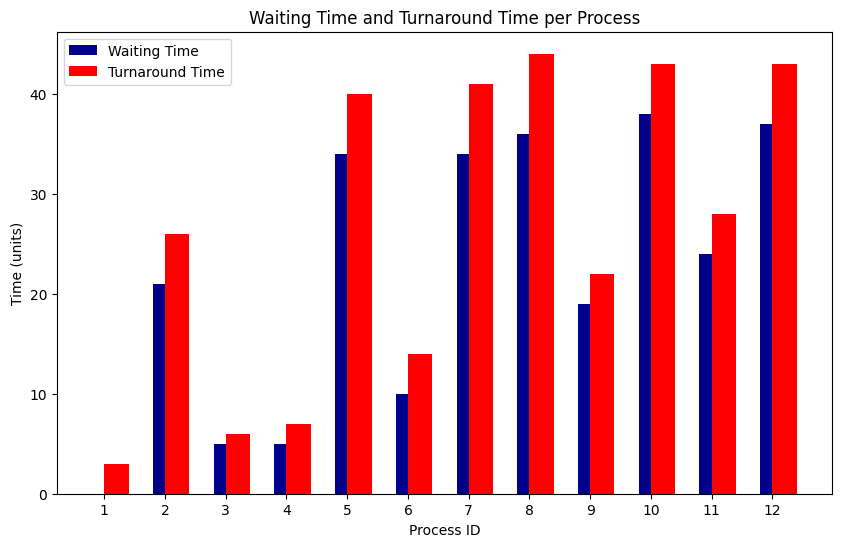

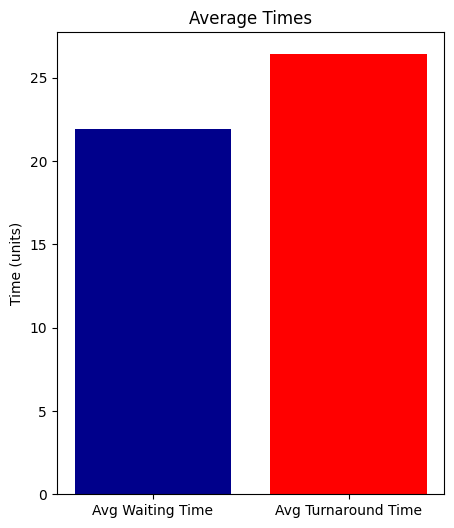

In [82]:
#@title python script to visualize
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('output2.csv')

# Extract data
process_ids = data['Process ID']
waiting_times = data['Waiting Time']
turnaround_times = data['Turnaround Time']

# Calculate averages
avg_waiting_time = waiting_times.mean()
avg_turnaround_time = turnaround_times.mean()

# Create a bar chart for individual processes
plt.figure(figsize=(10, 6))
x = range(len(process_ids))

# Plot waiting time and turnaround time
plt.bar(x, waiting_times, width=0.4, label='Waiting Time', color='darkblue', align='center')
plt.bar(x, turnaround_times, width=0.4, label='Turnaround Time', color='red', align='edge')

# Label the chart
plt.xticks(x, process_ids)
plt.xlabel('Process ID')
plt.ylabel('Time (units)')
plt.title('Waiting Time and Turnaround Time per Process')
plt.legend()

# Save the chart
plt.savefig('process_times_chart.png')
plt.show()

# Display averages
plt.figure(figsize=(5, 6))
plt.bar(['Avg Waiting Time', 'Avg Turnaround Time'],
        [avg_waiting_time, avg_turnaround_time],
        color=['darkblue', 'red'])
plt.ylabel('Time (units)')
plt.title('Average Times')

# Save the chart
plt.savefig('average_times_chart.png')
plt.show()


In [77]:
#@title RR
%%writefile RR.cpp
#include <iostream>
#include <vector>
#include <queue>
#include <iomanip>
#include <fstream> // For file handling
#include <numeric>
using namespace std;

struct Process {
    int pid;           // Process ID
    int arrival_time;  // Arrival time
    int burst_time;    // Burst time
};




void exportToCSV(vector<Process>& processes, vector<int>& waiting_time, vector<int>& turnaround_time) {
    ofstream file("output2.csv");
    file << "Process ID,Arrival Time,Burst Time,Waiting Time,Turnaround Time\n";
    for (int i = 0; i < processes.size(); i++) {
        file << processes[i].pid << ","
             << processes[i].arrival_time << ","
             << processes[i].burst_time << ","
             << waiting_time[i] << ","
             << turnaround_time[i] << "\n";
    }
    file.close();
    cout << "Output saved to output2.csv!" << endl;
}

// Function to calculate waiting time using Round Robin
void findWaitingTime(vector<Process>& processes, int time_quantum, vector<int>& waiting_time) {
    int n = processes.size();
    vector<int> remaining_time(n);
    vector<bool> in_queue(n, false);
    queue<int> ready_queue;

    for (int i = 0; i < n; i++) {
        remaining_time[i] = processes[i].burst_time;
    }

    int t = 0;  // Current time

    // Add the first process(es) to the queue
    for (int i = 0; i < n; i++) {
        if (processes[i].arrival_time <= t && !in_queue[i]) {
            ready_queue.push(i);
            in_queue[i] = true;
        }
    }

    while (!ready_queue.empty()) {
        int i = ready_queue.front();
        ready_queue.pop();
        in_queue[i] = false;

        if (remaining_time[i] > time_quantum) {
            t += time_quantum;
            remaining_time[i] -= time_quantum;
        } else {
            t += remaining_time[i];
            waiting_time[i] = t - processes[i].arrival_time - processes[i].burst_time;
            remaining_time[i] = 0;
        }

        // Add newly arrived processes to the queue
        for (int j = 0; j < n; j++) {
            if (processes[j].arrival_time <= t && remaining_time[j] > 0 && !in_queue[j]) {
                ready_queue.push(j);
                in_queue[j] = true;
            }
        }

        // Re-add the current process to the queue if it's not finished
        if (remaining_time[i] > 0) {
            ready_queue.push(i);
            in_queue[i] = true;
        }
    }
}

// Function to calculate turnaround time
void findTurnaroundTime(vector<Process>& processes, vector<int>& waiting_time, vector<int>& turnaround_time) {
    int n = processes.size();
    for (int i = 0; i < n; i++) {
        turnaround_time[i] = processes[i].burst_time + waiting_time[i];
    }
}

void printAndVisualize(vector<Process>& processes, int time_quantum) {
    int n = processes.size();
    vector<int> waiting_time(n), turnaround_time(n);

    findWaitingTime(processes, time_quantum, waiting_time);
    findTurnaroundTime(processes, waiting_time, turnaround_time);

    // Display the table in the console
    cout << "Processes  Arrival Time  Burst Time  Waiting Time  Turnaround Time\n";
    for (int i = 0; i < n; i++) {
        cout << "    " << processes[i].pid << "\t\t" << processes[i].arrival_time
             << "\t    " << processes[i].burst_time << "\t      " << waiting_time[i]
             << "\t\t  " << turnaround_time[i] << endl;
    }

    float avg_waiting_time = (float)accumulate(waiting_time.begin(), waiting_time.end(), 0) / n;
    float avg_turnaround_time = (float)accumulate(turnaround_time.begin(), turnaround_time.end(), 0) / n;
    cout << "\nAverage Waiting Time: " << avg_waiting_time << endl;
    cout << "Average Turnaround Time: " << avg_turnaround_time << endl;

    // Export results to CSV
    exportToCSV(processes, waiting_time, turnaround_time);
}


int main() {
   vector<Process> processes = {
    {1, 0, 3},
    {2, 1, 5},
    {3, 2, 1},
    {4, 3, 2},
    {5, 4, 6},
    {6, 5, 4},
    {7, 6, 7},
    {8, 7, 8},
    {9, 8, 3},
    {10, 9, 5},
    {11, 10, 4},
    {12, 11, 6}
};

    int time_quantum = 4;
    printAndVisualize(processes, time_quantum);

    return 0;
}


Overwriting RR.cpp


In [64]:
#@title RR run
%%script bash
g++ RR.cpp -o RR
./RR

Processes  Arrival Time  Burst Time  Waiting Time  Turnaround Time
    1		0	    3	      0		  3
    2		1	    5	      21		  26
    3		2	    1	      5		  6
    4		3	    2	      5		  7
    5		4	    6	      34		  40
    6		5	    4	      10		  14
    7		6	    7	      34		  41
    8		7	    8	      36		  44
    9		8	    3	      19		  22
    10		9	    5	      38		  43
    11		10	    4	      24		  28
    12		11	    6	      37		  43

Average Waiting Time: 21.9167
Average Turnaround Time: 26.4167
Output saved to output2.csv!


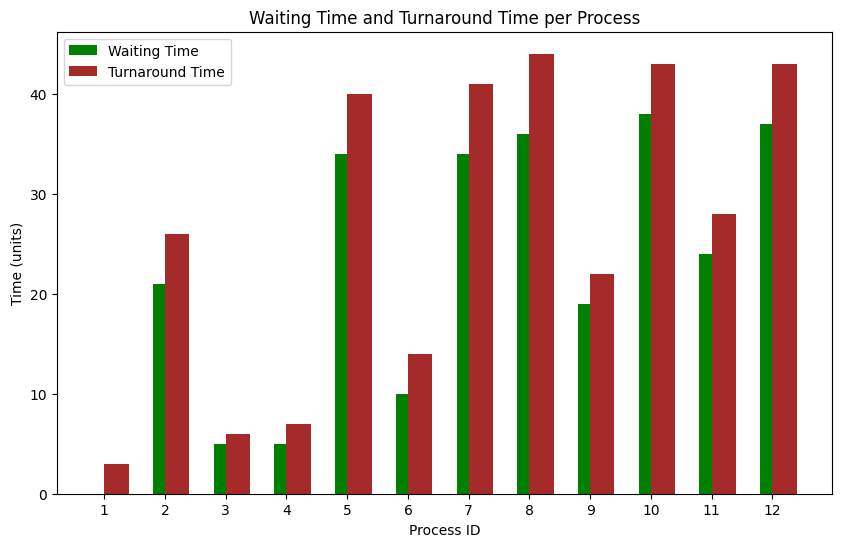

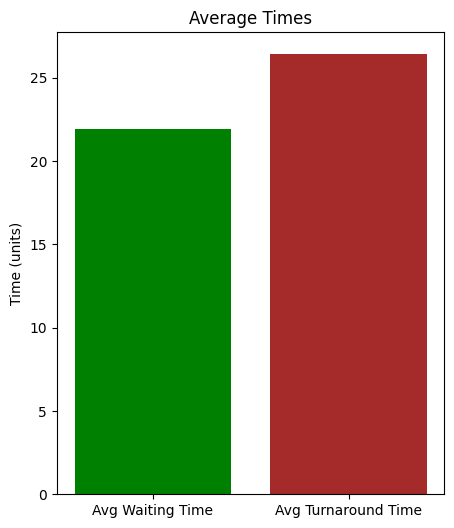

In [65]:
#@title python script to visualize
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('output2.csv')

# Extract data
process_ids = data['Process ID']
waiting_times = data['Waiting Time']
turnaround_times = data['Turnaround Time']

# Calculate averages
avg_waiting_time = waiting_times.mean()
avg_turnaround_time = turnaround_times.mean()

# Create a bar chart for individual processes
plt.figure(figsize=(10, 6))
x = range(len(process_ids))

# Plot waiting time and turnaround time
plt.bar(x, waiting_times, width=0.4, label='Waiting Time', color='green', align='center')
plt.bar(x, turnaround_times, width=0.4, label='Turnaround Time', color='brown', align='edge')

# Label the chart
plt.xticks(x, process_ids)
plt.xlabel('Process ID')
plt.ylabel('Time (units)')
plt.title('Waiting Time and Turnaround Time per Process')
plt.legend()

# Save the chart
plt.savefig('process_times_chart.png')
plt.show()

# Display averages
plt.figure(figsize=(5, 6))
plt.bar(['Avg Waiting Time', 'Avg Turnaround Time'],
        [avg_waiting_time, avg_turnaround_time],
        color=['green', 'brown'])
plt.ylabel('Time (units)')
plt.title('Average Times')

# Save the chart
plt.savefig('average_times_chart.png')
plt.show()


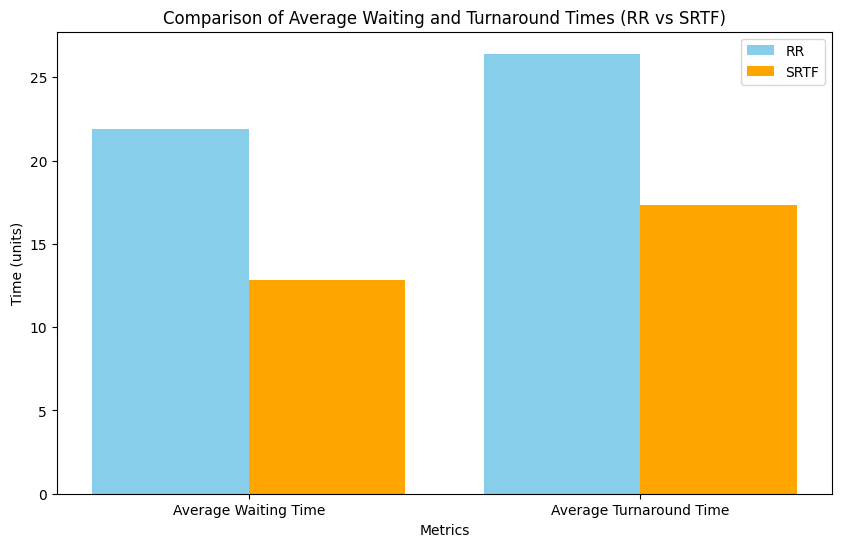

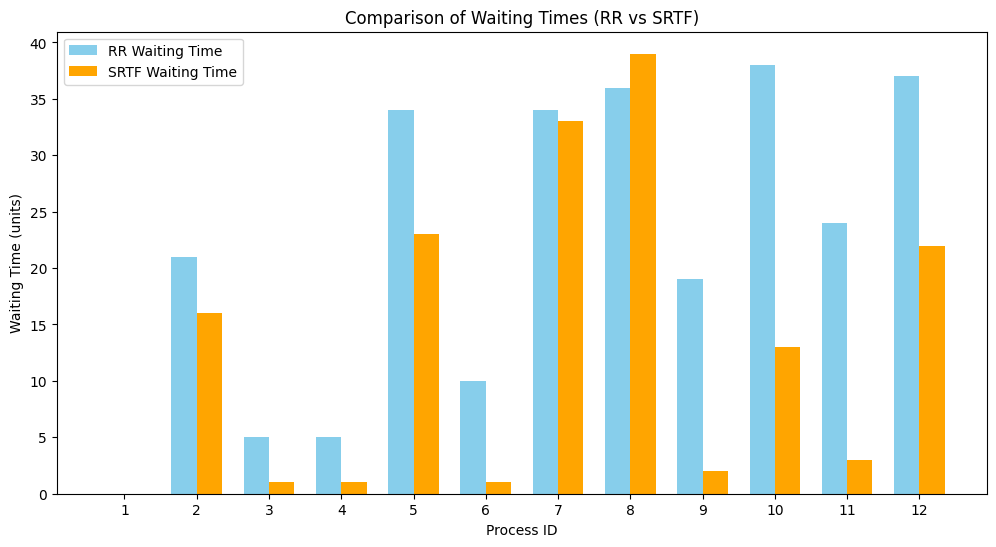

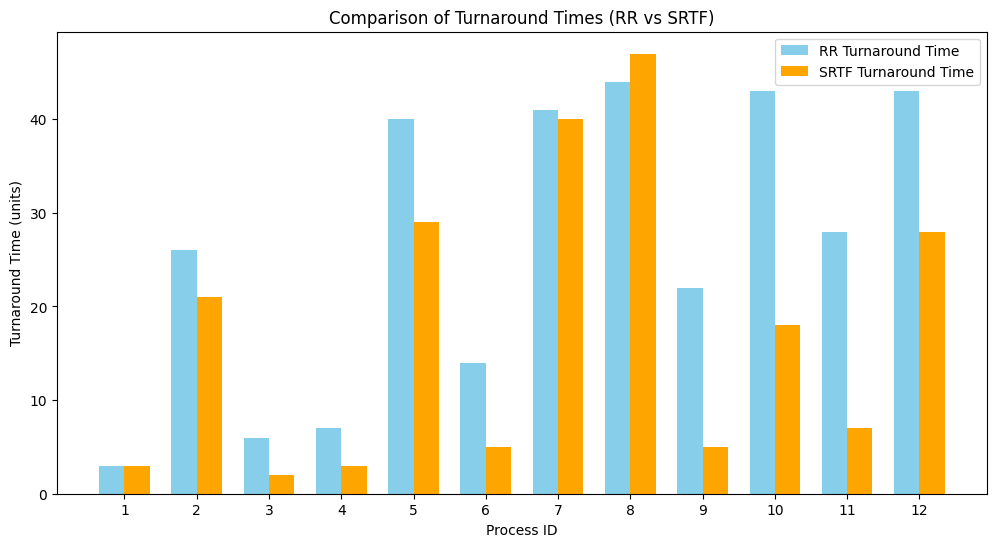

In [78]:
#@title python script to visualize

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV files
rr_data = pd.read_csv('output2.csv')
srtf_data = pd.read_csv('output.csv')

# Compute the average waiting time and average turnaround time
rr_avg_waiting = rr_data['Waiting Time'].mean()
rr_avg_turnaround = rr_data['Turnaround Time'].mean()

srtf_avg_waiting = srtf_data['Waiting Time'].mean()
srtf_avg_turnaround = srtf_data['Turnaround Time'].mean()

# Prepare the data for plotting
metrics = ['Average Waiting Time', 'Average Turnaround Time']
rr_values = [rr_avg_waiting, rr_avg_turnaround]
srtf_values = [srtf_avg_waiting, srtf_avg_turnaround]

x = range(len(metrics))  # x locations for the groups

# Create a bar chart to compare the averages
plt.figure(figsize=(10, 6))
plt.bar(x, rr_values, width=0.4, label='RR', color='skyblue', align='center')
plt.bar([i + 0.4 for i in x], srtf_values, width=0.4, label='SRTF', color='orange', align='center')
# Extract process IDs, waiting times, and turnaround times
process_ids = rr_data['Process ID']
rr_waiting_times = rr_data['Waiting Time']
srtf_waiting_times = srtf_data['Waiting Time']
rr_turnaround_times = rr_data['Turnaround Time']
srtf_turnaround_times = srtf_data['Turnaround Time']
# Customize the chart
plt.xticks([i + 0.2 for i in x], metrics)
plt.xlabel('Metrics')
plt.ylabel('Time (units)')
plt.title('Comparison of Average Waiting and Turnaround Times (RR vs SRTF)')
plt.legend()

# Save and show the plot
plt.savefig('average_comparison_rr_srtf.png')
plt.show()
# Set the width of bars and positions
bar_width = 0.35
x = np.arange(len(process_ids))

# Plot Waiting Time Comparison
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, rr_waiting_times, bar_width, label='RR Waiting Time', color='skyblue')
plt.bar(x + bar_width/2, srtf_waiting_times, bar_width, label='SRTF Waiting Time', color='orange')

# Customize the chart
plt.xticks(x, process_ids)
plt.xlabel('Process ID')
plt.ylabel('Waiting Time (units)')
plt.title('Comparison of Waiting Times (RR vs SRTF)')
plt.legend()
plt.savefig('waiting_time_comparison.png')
plt.show()

# Plot Turnaround Time Comparison
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, rr_turnaround_times, bar_width, label='RR Turnaround Time', color='skyblue')
plt.bar(x + bar_width/2, srtf_turnaround_times, bar_width, label='SRTF Turnaround Time', color='orange')

# Customize the chart
plt.xticks(x, process_ids)
plt.xlabel('Process ID')
plt.ylabel('Turnaround Time (units)')
plt.title('Comparison of Turnaround Times (RR vs SRTF)')
plt.legend()
plt.savefig('turnaround_time_comparison.png')
plt.show()
